# Logistic Regression - Get Excited!


# Importing The Libraries





In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import Dataset

In [3]:
dataset = pd.read_csv('car_data_fewer_fields_training_data_half_size.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#Display the dataset
print(dataset)

     Age  AnnualSalary  Purchased
0     35         20000          0
1     40         43500          0
2     49         74000          0
3     40        107500          1
4     25         79000          0
..   ...           ...        ...
398   39         81500          0
399   45        151500          1
400   36         51500          0
401   40         62500          0
402   25         85500          0

[403 rows x 3 columns]


<ipython-input-4-777f9496e644>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


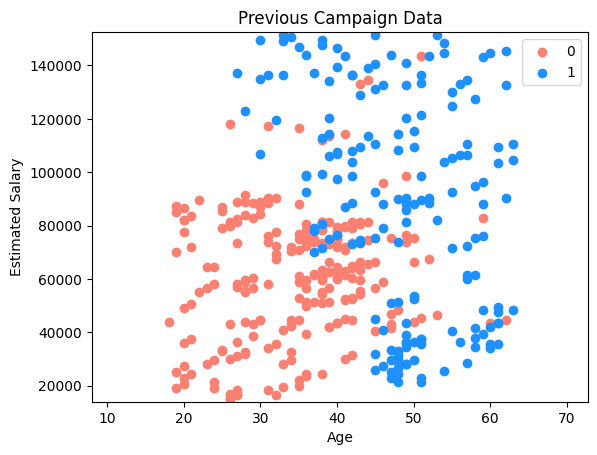

In [4]:
# Plot the Dataset
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# Assuming X and y are already defined
X_set, y_set = X, y

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.25)
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("salmon", "dodgerblue"))(i),
        label=j
    )

plt.title('Previous Campaign Data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Features Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# Training the Logistic Regression model on the Previous Campaign

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression (random_state = 0)
classifier.fit(X_sc, y)

LogisticRegression(random_state=0)

# Visualising The Model Results

<ipython-input-7-7bd14d98c0c8>:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


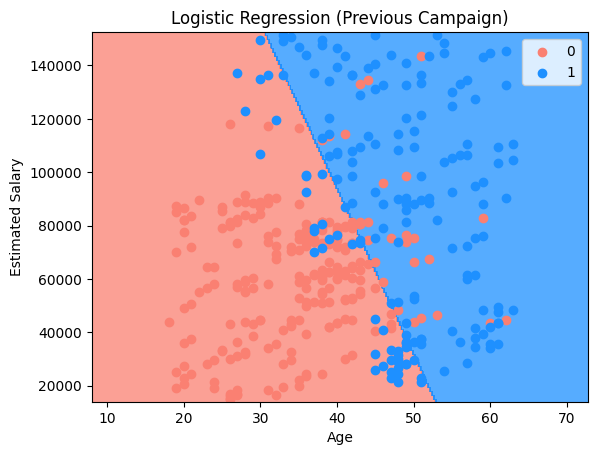

In [7]:
from matplotlib.colors import ListedColormap

# Inverse transform the scaled data
X_set, y_set = sc.inverse_transform(X_sc), y

# Create meshgrid
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.25)
)

# Plot decision boundary
plt.contourf(
    X1, X2,
    classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("salmon", "dodgerblue"))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot the data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("salmon", "dodgerblue"))(i),
        label=j
    )

plt.title('Logistic Regression (Previous Campaign)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Import New Project Data

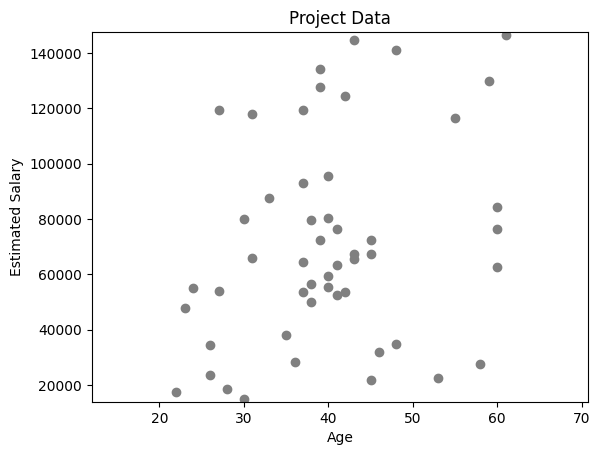

In [8]:
# Import Project data
project_dataset = pd.read_csv('car_data_fewer_fields_testing_data_quarter_size.csv')

# Define the X variable
X_project = project_dataset.iloc[:, :].values

# Plot the data
X_set = X_project
X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
    np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25)
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.scatter(X_set[:, 0], X_set[:, 1], c='gray')
plt.title('Project Data')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

# Apply Our Model To New Project

In [9]:
#Apply feature scaling
X_project_sc = sc.transform(X_project)
#Run the model to make predictions
y_project_pred = classifier.predict(X_project_sc)

# Visualizing The Predictions

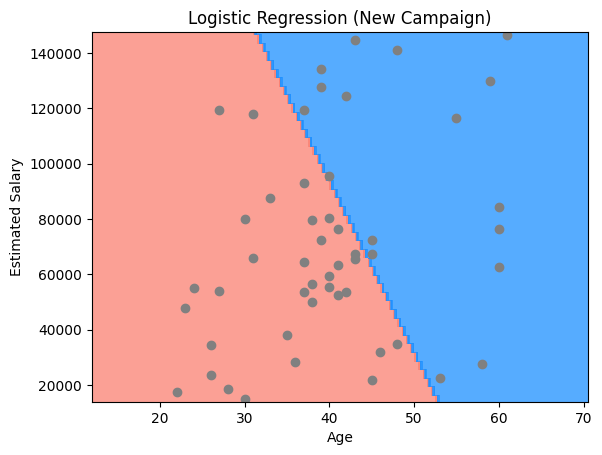

In [ ]:
# Plot the results
from matplotlib.colors import ListedColormap

# Inverse transform the scaled project data and use predicted labels
X_set, y_set = sc.inverse_transform(X_project_sc), y_project_pred

# Create meshgrid for contour plotting
X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.5), # change step: from .25 to .5
    np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.5)
)

# Plot decision boundary
plt.contourf(
    X1, X2,
    classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('salmon', 'dodgerblue'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot project data points
plt.scatter(X_set[:, 0], X_set[:, 1], c='gray')
plt.title('Logistic Regression (New Campaign)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()